In [108]:
import tensorflow as tf
import keras
from keras import layers
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

Encoder

In [57]:
encoded_input = keras.Input(shape=(32, 32, 3), name="image_input")
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(encoded_input)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = keras.layers.Flatten()(x)
encoder_output = keras.layers.Dense(128, activation='relu')(x)

model_encoder = keras.Model(encoded_input, encoder_output, name='model_encoder')

Decoder

In [59]:
decoder_input = keras.layers.Dense(256, activation='relu')(encoder_output)

x = keras.layers.Reshape((4, 4, 16))(decoder_input)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)

decoded = layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', padding='same')(x)

CNN AE

In [60]:
autoencoder = keras.Model(encoded_input, decoded, name='model_cnn_autoencoder')

In [61]:
autoencoder.summary()

Model: "model_cnn_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 16)

In [62]:
optimizer_adam = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
autoencoder.compile(optimizer=optimizer_adam, loss='mse')

In [63]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [64]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
# x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
epochs = 15

for epoch in range(epochs):
    history = autoencoder.fit(x_train, x_train, epochs=1, batch_size=128, validation_split=0.1, callbacks=[TensorBoard(log_dir='../data/autoencoder')])
    autoencoder.save(f"../models/ModelCNNAutoEncoder-{epoch+1}.model")

In [ ]:
# terminal command: tensorboard --logdir=./data/autoencoder

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='../data/autoencoder')])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


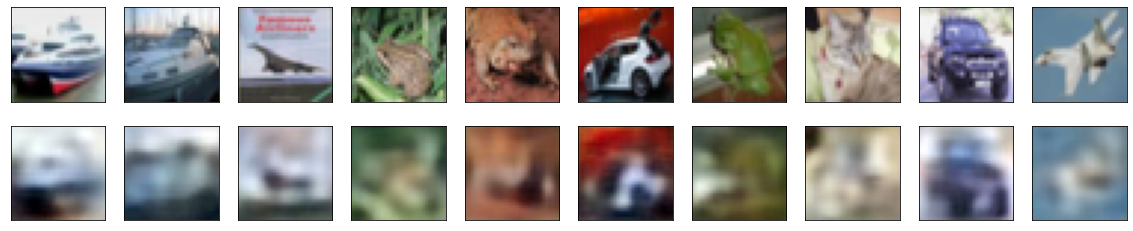

In [68]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

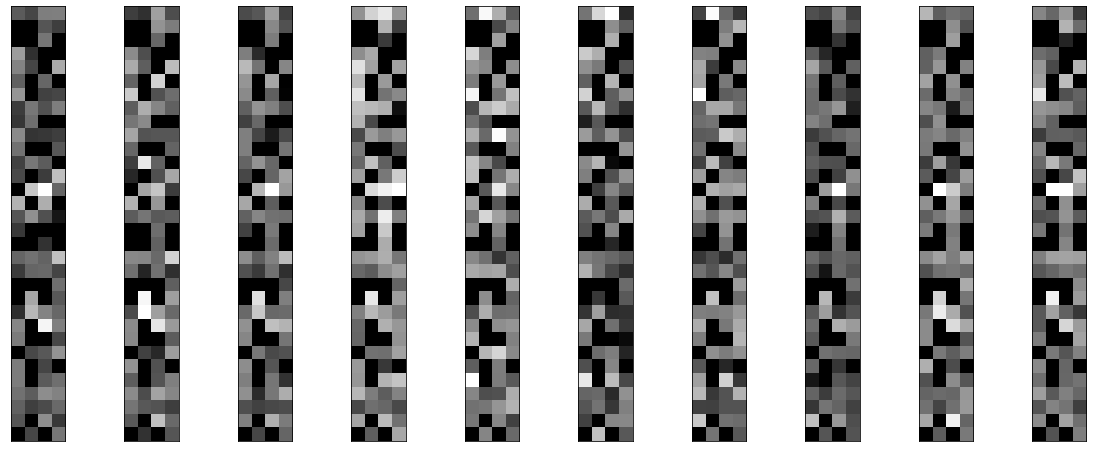

In [76]:
encoded_imgs = model_encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf

def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  # shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  # long_dim = max(shape)
  # scale = max_dim / long_dim
  #
  # new_shape = tf.cast(shape * scale, tf.int32)
  #
  # img = tf.image.resize(img, new_shape)
  # img = img[tf.newaxis, :]
  return img

path = '../data/test.png'
x = load_img(path)

plt.imshow(x)

In [104]:
test_decoded_imgs = autoencoder.predict(np.array([x]))

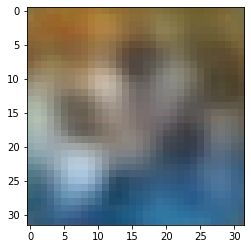

In [106]:
plt.imshow(decoded_imgs[0].reshape(32, 32, 3))